**DATA 608 Story 4 : How much do we get paid?**

**Gullit Navarrete**

**10/26/25**

# Introduction



# Data Import



In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

git = "https://github.com/GullitNa/DATA608-Story4/raw/refs/heads/main/state_M2024_dl.xlsx"

df_raw = pd.read_excel(git, engine="openpyxl")
print(f"Loaded shape: {df_raw.shape[0]:,} rows × {df_raw.shape[1]} columns")
print("Columns:", list(df_raw.columns))
display(df_raw.head(10))


Loaded shape: 37,609 rows × 32 columns
Columns: ['AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE', 'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP', 'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'ANNUAL', 'HOURLY']


,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,21.07,30.82,47.51,23520,30660,43830,64110,98810,NaN,NaN
1,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,48.39,68.5,98.03,51100,72870,100640,142480,203900,NaN,NaN
2,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,79.04,106.69,#,104950,130950,164400,221910,#,NaN,NaN
3,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,...,51.12,78.26,#,50410,74720,106330,162780,#,NaN,NaN
4,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1031,Legislators,...,*,*,*,18270,20950,26990,41760,63900,True,NaN
5,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-2011,Advertising and Promotions Managers,...,64.22,69.57,72.44,83570,86500,133570,144710,150670,NaN,NaN
6,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-2021,Marketing Managers,...,54.31,78.64,105.29,65360,83940,112960,163580,219000,NaN,NaN
7,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-2022,Sales Managers,...,52.28,78.55,#,66100,83790,108740,163390,#,NaN,NaN
8,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-2032,Public Relations Managers,...,44.73,61.91,88.62,52670,76540,93040,128770,184330,NaN,NaN
9,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-2033,Fundraising Managers,...,41.15,53.2,93.36,55350,60260,85600,110650,194180,NaN,NaN


The preview tells us that the file contains state level OEWS rows by occupation (head showing us 10 only which shows Alabama only so far) listing hourly and annual wage percentiles and employment metrics for each SOC title.

# Data Transformation

First thing I notice that needs to be address before any transformation is the fact that the raw column names are messy, inconsistent, and not easy to read or plot. One of my favorite tools to maintain consistancy is to rename these original BLS columns into shorter, friendlier names (like "annual_median_wage" or "state" for example) so the rest of the analysis is easier to work with.

In [40]:
rename_map = {
    'AREA': 'area_code',
    'AREA_TITLE': 'state',
    'AREA_TYPE': 'area_type',
    'PRIM_STATE': 'state_abbr',
    'OCC_CODE': 'occ_code',
    'OCC_TITLE': 'occupation',
    'TOT_EMP': 'employment_count',
    'EMP_PRSE': 'employment_prse',
    'JOBS_1000': 'jobs_per_1000',
    'LOC_QUOTIENT': 'location_quotient',
    'H_MEDIAN': 'hourly_median_wage',
    'H_PCT75': 'hourly_pct75',
    'H_PCT90': 'hourly_pct90',
    'A_PCT10': 'annual_pct10',
    'A_PCT25': 'annual_pct25',
    'A_MEDIAN': 'annual_median_wage',
    'A_PCT75': 'annual_pct75',
    'A_PCT90': 'annual_pct90'
}

df_clean = df_raw.rename(columns=rename_map).copy()
df_clean['state'] = df_clean['state'].astype(str).str.strip()
df_clean['occupation'] = df_clean['occupation'].astype(str).str.strip()

# Change pay and employment columns to numeric
numeric_cols = [
    'employment_count',
    'hourly_median_wage', 'hourly_pct75', 'hourly_pct90',
    'annual_pct10', 'annual_pct25', 'annual_median_wage',
    'annual_pct75', 'annual_pct90'
]

for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# ONLY keeping what columns are necessary
keep_cols = [
    'state', 'state_abbr', 'area_type',
    'occ_code', 'occupation',
    'employment_count',
    'hourly_median_wage', 'hourly_pct75', 'hourly_pct90',
    'annual_pct10', 'annual_pct25', 'annual_median_wage',
    'annual_pct75', 'annual_pct90'
]

df_clean = df_clean[keep_cols].copy()
print(df_clean.shape)
df_clean.head(10)

(37609, 14)


,state,state_abbr,area_type,occ_code,occupation,employment_count,hourly_median_wage,hourly_pct75,hourly_pct90,annual_pct10,annual_pct25,annual_median_wage,annual_pct75,annual_pct90
0,Alabama,AL,2,00-0000,All Occupations,2091480.0,21.07,30.82,47.51,23520.0,30660.0,43830.0,64110.0,98810.0
1,Alabama,AL,2,11-0000,Management Occupations,110240.0,48.39,68.50,98.03,51100.0,72870.0,100640.0,142480.0,203900.0
2,Alabama,AL,2,11-1011,Chief Executives,830.0,79.04,106.69,NaN,104950.0,130950.0,164400.0,221910.0,NaN
3,Alabama,AL,2,11-1021,General and Operations Managers,32370.0,51.12,78.26,NaN,50410.0,74720.0,106330.0,162780.0,NaN
4,Alabama,AL,2,11-1031,Legislators,1120.0,NaN,NaN,NaN,18270.0,20950.0,26990.0,41760.0,63900.0
5,Alabama,AL,2,11-2011,Advertising and Promotions Managers,50.0,64.22,69.57,72.44,83570.0,86500.0,133570.0,144710.0,150670.0
6,Alabama,AL,2,11-2021,Marketing Managers,1660.0,54.31,78.64,105.29,65360.0,83940.0,112960.0,163580.0,219000.0
7,Alabama,AL,2,11-2022,Sales Managers,4380.0,52.28,78.55,NaN,66100.0,83790.0,108740.0,163390.0,NaN
8,Alabama,AL,2,11-2032,Public Relations Managers,410.0,44.73,61.91,88.62,52670.0,76540.0,93040.0,128770.0,184330.0
9,Alabama,AL,2,11-2033,Fundraising Managers,210.0,41.15,53.20,93.36,55350.0,60260.0,85600.0,110650.0,194180.0


Here is more of the real focus for "Data Transformation" in that I start shaping the cleaned table into the exact slice I actually need for analysis: I filter the data down to state-level rows only (area_type == 2, which means individual states instead of national totals or metro areas), and then I keep only the key columns like state, occupation title, total employment, and the different pay metrics. My goal here is to end up with one tidy table that links each state to each data job title and its pay, so I can compare salary by role and by state in the visualization step.


In [41]:
df_state_only = df_clean[df_clean['area_type'] == 2].copy()

# Role patterns to turn the occupation's text into a high-level role_group
role_patterns = {
    'Data Scientist': [
        'data scientist'
    ],
    'Data Analyst / Business Analyst': [
        'data analyst',
        'business analyst',
        'business intelligence',
        'operations research analyst',
        'market research analyst'
    ],
    'Data Engineer': [
        'data engineer',
        'data engineering',
        'data warehous',
        'data warehouse'
    ],
    'Data Architect / Database Architect': [
        'database administrator',
        'database administrators',
        'database architect',
        'database architects',
        'data architect',
        'data architects'
    ]
}

def map_role(occ_title: str) -> str:
    """
    Tries to bucket a raw BLS occupation title into one of our
    high-level 'data practitioner' groups.
    Returns None if it doesn't match any.
    """
    title_lower = occ_title.lower()
    for group_name, pattern_list in role_patterns.items():
        for pat in pattern_list:
            if pat in title_lower:
                return group_name
    return None

df_state_only['role_group'] = df_state_only['occupation'].apply(map_role)
# Filter
df_roles = df_state_only[~df_state_only['role_group'].isna()].copy()
df_roles = df_roles.dropna(subset=['annual_median_wage'])

# Table holds average of annual_median_wage and total employment_count in that state for that role_group
salary_state_role = (
    df_roles
      .groupby(['state', 'state_abbr', 'role_group'], as_index=False)
      .agg(
          avg_annual_median_wage=('annual_median_wage', 'mean'),
          total_employment=('employment_count', 'sum')
      )
)

# Rebuilding states for future heatmap use
state_info = [
    ('AL','Alabama','01'), ('AK','Alaska','02'), ('AZ','Arizona','04'),
    ('AR','Arkansas','05'), ('CA','California','06'), ('CO','Colorado','08'),
    ('CT','Connecticut','09'), ('DE','Delaware','10'), ('DC','District of Columbia','11'),
    ('FL','Florida','12'), ('GA','Georgia','13'), ('HI','Hawaii','15'),
    ('ID','Idaho','16'), ('IL','Illinois','17'), ('IN','Indiana','18'),
    ('IA','Iowa','19'), ('KS','Kansas','20'), ('KY','Kentucky','21'),
    ('LA','Louisiana','22'), ('ME','Maine','23'), ('MD','Maryland','24'),
    ('MA','Massachusetts','25'), ('MI','Michigan','26'), ('MN','Minnesota','27'),
    ('MS','Mississippi','28'), ('MO','Missouri','29'), ('MT','Montana','30'),
    ('NE','Nebraska','31'), ('NV','Nevada','32'), ('NH','New Hampshire','33'),
    ('NJ','New Jersey','34'), ('NM','New Mexico','35'), ('NY','New York','36'),
    ('NC','North Carolina','37'), ('ND','North Dakota','38'), ('OH','Ohio','39'),
    ('OK','Oklahoma','40'), ('OR','Oregon','41'), ('PA','Pennsylvania','42'),
    ('RI','Rhode Island','44'), ('SC','South Carolina','45'), ('SD','South Dakota','46'),
    ('TN','Tennessee','47'), ('TX','Texas','48'), ('UT','Utah','49'),
    ('VT','Vermont','50'), ('VA','Virginia','51'), ('WA','Washington','53'),
    ('WV','West Virginia','54'), ('WI','Wisconsin','55'), ('WY','Wyoming','56')
]

master_states = pd.DataFrame(state_info, columns=['state_abbr','state_full','state_fips'])
states_geo = alt.topo_feature(vega_data.us_10m.url, 'states')
salary_state_role = salary_state_role.sort_values(
    by=['role_group', 'avg_annual_median_wage'],
    ascending=[True, False]
).reset_index(drop=True)
print(salary_state_role.shape)
salary_state_role.head(20)

(152, 5)


,state,state_abbr,role_group,avg_annual_median_wage,total_employment
0,Virginia,VA,Data Analyst / Business Analyst,101445.0,31190.0
1,New York,NY,Data Analyst / Business Analyst,100640.0,81120.0
2,Delaware,DE,Data Analyst / Business Analyst,99930.0,3820.0
3,District of Columbia,DC,Data Analyst / Business Analyst,99660.0,7760.0
4,Washington,WA,Data Analyst / Business Analyst,95395.0,28880.0
5,California,CA,Data Analyst / Business Analyst,94845.0,119490.0
6,New Jersey,NJ,Data Analyst / Business Analyst,93205.0,25600.0
7,Colorado,CO,Data Analyst / Business Analyst,92615.0,30910.0
8,Massachusetts,MA,Data Analyst / Business Analyst,91730.0,42180.0
9,Vermont,VT,Data Analyst / Business Analyst,91570.0,1120.0


# Data Visualizations

In terms of Data visualizations for how much these roles get paid, I'm going to walk through pay in three steps so it's easy to compare. First, I'll build a state-by-role heat map that shades each pair by its median annual wage, so you can scan where the money is and see how the same job pays differently across the country. Followed by zooming in on a single role like “Data Scientist” and rank the top paying states using a horizontal bar chart, which makes it clear who is actually on top and by how much. Finally, I'll collapse everything to the national level and compare median salary across the main “data practitioner” job titles, so I can answer the subject as to which roles in the data science typically earn the most overall.

Most of what I'm going for here aligns with the higher accuracy side of the visual encoding spectrum as that tends to work hand to hand with the direct numerical statistics shown across the data (although more on the heat map specifically further down the line).

## New Salary Table
Here the code builds a tidy salary table for these roles by keeping only the columns we care about which are state, occupation title, median annual wage, and employment count, and then standardizing job titles into a smaller set for comparison amongst pay across states.

In [42]:
target_pattern = (
    r"data scientist|data engineer|data analyst|business intelligence|business analyst|"
    r"database architect|data architect|data administrator|database administrator"
)

role_df = (
    df_state_only[
        df_state_only['occupation'].str.contains(target_pattern, case=False, na=False)
    ]
    .copy()
)

role_df = role_df[[
    'state_abbr',
    'state',
    'occupation',
    'annual_median_wage',
    'employment_count'
]]

role_salary_state = (
    role_df
    .groupby(['state_abbr', 'state', 'occupation'], as_index=False)
    .agg({
        'annual_median_wage': 'median',
        'employment_count': 'sum'
    })
)

# shorter occupation labels
role_salary_state['occupation_clean'] = (
    role_salary_state['occupation']
      .str.replace('Analysts?', 'Analyst', regex=True)
      .str.replace('Scientists?', 'Scientist', regex=True)
      .str.replace('Administrators?', 'Administrator', regex=True)
      .str.replace('Database', 'DB', regex=True)
      .str.replace('Business Intelligence', 'BI', regex=True)
      .str.replace('Computer and Information Research', 'Research', regex=True)
      .str.replace('Computer and Information Systems', 'Info Systems', regex=True)
      .str.replace('Architects?', 'Architect', regex=True)
      .str.replace('Engineers?', 'Engineer', regex=True)
      .str.strip()
)
display(role_salary_state.head())

,state_abbr,state,occupation,annual_median_wage,employment_count,occupation_clean
0,AK,Alaska,Data Scientists,77400.0,210.0,Data Scientist
1,AK,Alaska,Database Administrators,93180.0,90.0,DB Administrator
2,AK,Alaska,Database Architects,113800.0,40.0,DB Architect
3,AL,Alabama,Data Scientists,105410.0,1620.0,Data Scientist
4,AL,Alabama,Database Administrators,88560.0,1990.0,DB Administrator


The product here shows for each state what each role is called, and how much the typical person in that role makes in a year, as well as how many people have that job.

## Heatmap

For the heatmap visual, I'm planning on making three U.S. maps, one for each data job, by matching the wages from the BLS to each state and coloring the states by their typical pay. The reason for the sudden heatmap is because not only did I gravitate towards its useful from story 3, but matching the pattern for shading in visually encoded more generalized data fits perfectly here. Additionally it's because it lets me quickly see which states pay more or less for the same role just by looking at color, as another example of its general data showing skills.

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data as vega_data

df_map_pay = salary_state_role.copy()

salary_state_role['avg_annual_median_wage'] = pd.to_numeric(
    salary_state_role['avg_annual_median_wage'],
    errors='coerce'
)
salary_state_role['total_employment'] = pd.to_numeric(
    salary_state_role['total_employment'],
    errors='coerce'
)

# 2. Get one global wage range so every subplot uses the same legend/colors
pay_min = salary_state_role['avg_annual_median_wage'].min(skipna=True)
pay_max = salary_state_role['avg_annual_median_wage'].max(skipna=True)

# 3. Add numeric FIPS code so we can join to the topojson map
state_lookup = master_states[['state_abbr', 'state_full', 'state_fips']].copy()
state_lookup['state_fips_num'] = state_lookup['state_fips'].astype(int)

salary_with_fips = salary_state_role.merge(
    state_lookup,
    on='state_abbr',
    how='left'
)

# 4. US states geometry (TopoJSON)
states_geo = alt.topo_feature(vega_data.us_10m.url, 'states')

# 5. Helper to build one map for a single role_group
def make_role_map(role_name):
    role_df = salary_with_fips[salary_with_fips['role_group'] == role_name].copy()

    chart = (
        alt.Chart(states_geo)
        .mark_geoshape(stroke='white', strokeWidth=0.5)
        .project('albersUsa')
        .transform_lookup(
            lookup='id',  # topojson state's numeric id
            from_=alt.LookupData(
                role_df,
                key='state_fips_num',
                fields=[
                    'state',                       # state name from BLS
                    'state_abbr',                  # 2-letter abbr
                    'avg_annual_median_wage',      # median annual wage
                    'total_employment'             # total headcount in that role
                ]
            )
        )
        .encode(
            color=alt.Color(
                'avg_annual_median_wage:Q',
                title='Median annual wage ($)',
                scale=alt.Scale(
                    scheme='viridis',
                    domain=[pay_min, pay_max]  # shared min/max for fair comparison
                )
            ),
            tooltip=[
                alt.Tooltip('state:N', title='State'),
                alt.Tooltip('state_abbr:N', title='Abbr'),
                alt.Tooltip('avg_annual_median_wage:Q',
                            title='Median $', format=',.0f'),
                alt.Tooltip('total_employment:Q',
                            title='Employment', format=',')
            ]
        )
        .properties(
            width=320,
            height=200,
            title=role_name
        )
    )

    return chart

# 6. Build one map per role_group, then lay them out in a row
roles_in_data = list(salary_state_role['role_group'].unique())

role_maps = [make_role_map(r) for r in roles_in_data]

salary_maps_row = (
    alt.hconcat(*role_maps)
      .resolve_scale(color='shared')  # one shared legend/color scale
      .properties(
          title='Median Annual Wage by State (Each Data Role)'
      )
)

salary_maps_row

alt.HConcatChart(...)

Looking at the maps, I can infer that pay is defiently not the same nor generally all that similar everywhere in the country. Some states consistently show higher colors for certain roles, which suggests those roles are valued more or are harder to hire for in those places. Other states pay less across all roles, which may point to lower cost of living, weaker demand, or different job expectations. By comparing the same role across states, and then comparing roles inside a single state, the question at hand isn't so 2-dimensial but rather allows for exploration on all of these other comparisons.

## Top Ten States Highest Pay per Role

With the use of the helper function, it first takes the cleaned salary table, filters it down to just one role group (like “Data Scientist”), sorts states by median annual wage from highest to lowest, keeps the top 10, and then makes a horizontal bar chart with dollar labels. This visual matters because it directly answers “where does this role get paid the most?” in a way that is easy to compare across states using position along a shared scale (which aligns with my earlier entailing of high-accuracy visual encoding).

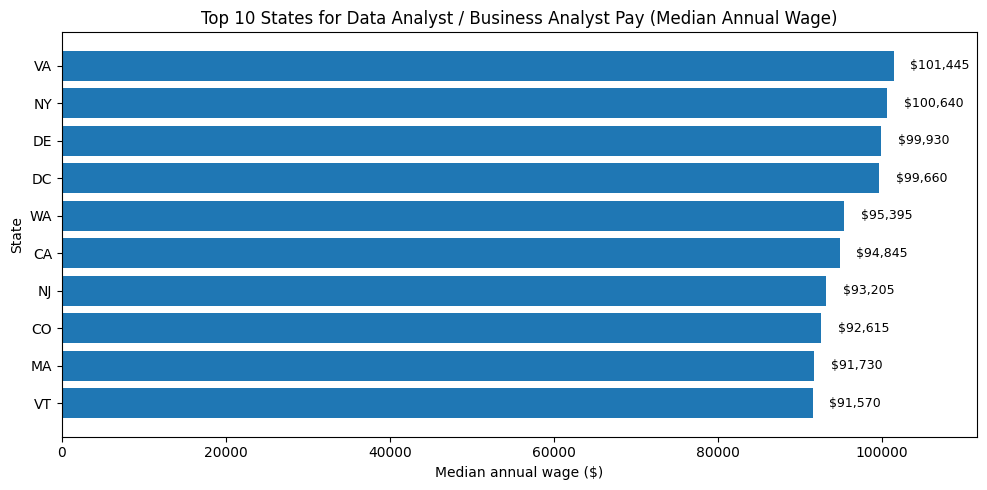

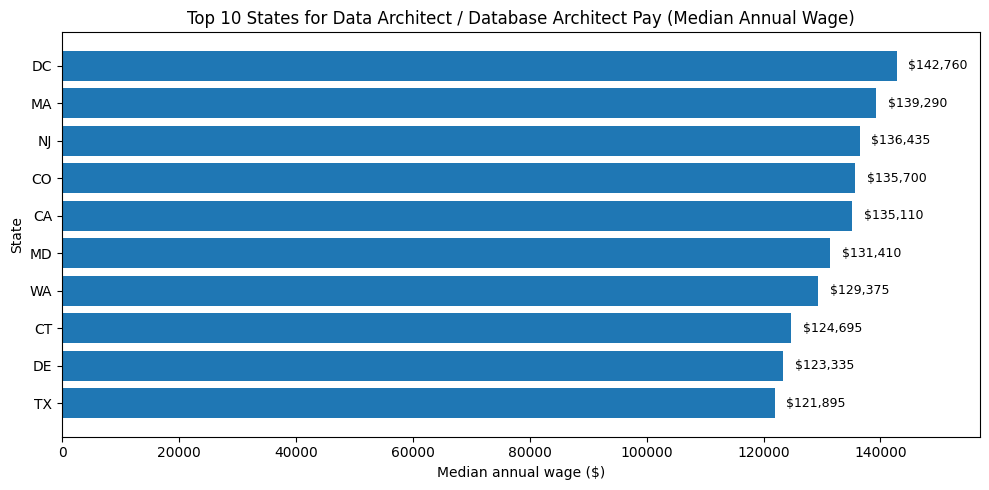

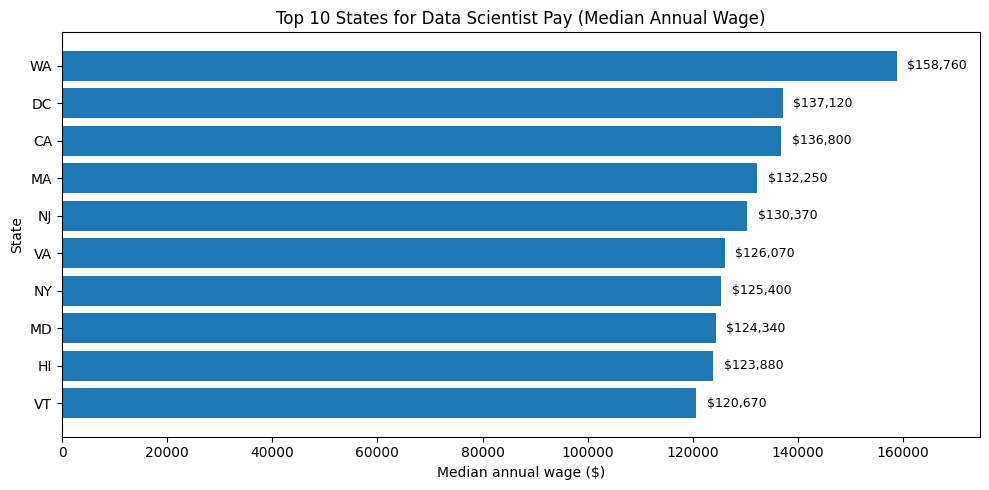

In [51]:
def plot_top10_role(role_name, df=salary_state_role):
    """
    Make a horizontal bar chart of the top 10 states by median annual wage
    for a given role_group.
    """

    # filter just this role
    sub = (
        df[df['role_group'] == role_name]
        .copy()
        .sort_values('avg_annual_median_wage', ascending=False)
        .head(10)
    )

    # we'll plot highest at the top, so reverse for barh()
    sub = sub.iloc[::-1]

    fig, ax = plt.subplots(figsize=(10, 5))

    bars = ax.barh(
        sub['state_abbr'],
        sub['avg_annual_median_wage'],
        color='#1f77b4'
    )

    ax.set_xlabel('Median annual wage ($)')
    ax.set_ylabel('State')
    ax.set_title(f"Top 10 States for {role_name} Pay (Median Annual Wage)")

    # Add data labels to the end of each bar
    for bar, wage in zip(bars, sub['avg_annual_median_wage']):
        ax.text(
            bar.get_width() + 2000,                 # a little to the right
            bar.get_y() + bar.get_height() / 2,
            f"${wage:,.0f}",
            va='center',
            fontsize=9
        )

    # nice x-limit padding
    max_wage = sub['avg_annual_median_wage'].max()
    ax.set_xlim(0, max_wage * 1.1)
    plt.tight_layout()
    plt.show()
plot_top10_role("Data Analyst / Business Analyst")
plot_top10_role("Data Architect / Database Architect")
plot_top10_role("Data Scientist")

According to these results, similarily to what we've seen back on the previous visual of a heatmap, pay levels are inconsistent across roles as well as across different states. For "Data Analysts / Business Analysts", the top salaries are mostly in the Northeast and West Coast, but even the best states for that role are just above 100k. For "Data Architects / Database Architects", the top pay is much higher for places like D.C., Massachusetts, New Jersey, Colorado, and California are all above 130K, which suggests this role is treated as senior/critical infrastructure work. For Data Scientists, Washington is way out in front at about 158K median, followed by D.C., California, Massachusetts, and New Jersey, all well above 120K. Overall high-paying states tend to repeat, but the pay amount still depends on the role itself, with "Data Scientists and Architects" getting paid more than Analysts almost everywhere.

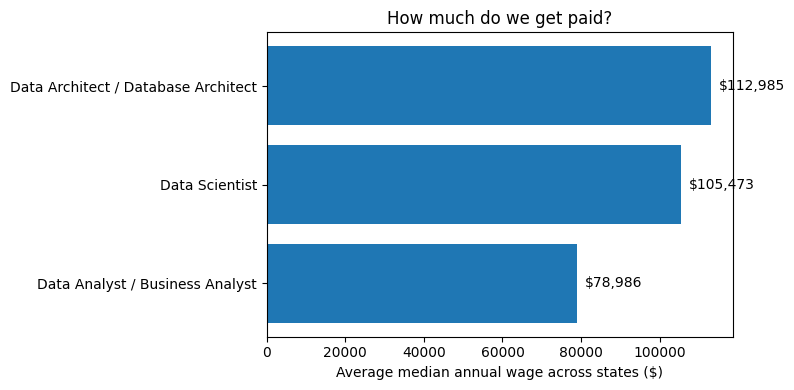

In [55]:
role_summary = (
    salary_state_role
      .groupby('role_group', as_index=False)
      .agg(
          avg_us_median_wage=('avg_annual_median_wage', 'mean'),
          total_workers=('total_employment', 'sum')
      )
)

role_summary = role_summary.sort_values(
    by='avg_us_median_wage', ascending=True
)

fig, ax = plt.subplots(figsize=(8,4))

bars = ax.barh(
    role_summary['role_group'],
    role_summary['avg_us_median_wage']
)

for bar, wage in zip(bars, role_summary['avg_us_median_wage']):
    ax.text(
        wage + 2000,
        bar.get_y() + bar.get_height()/2,
        f"${wage:,.0f}",
        va='center'
    )

ax.set_xlabel("Average median annual wage across states ($)")
ax.set_title("How much do we get paid?")
plt.tight_layout()
plt.show()

# Conclusion

Pay within the data industry is different all across the board. It changes based on what your role is and what state you work in. From the data, Data Scientists and Data Architects/Database Architects usually make the most, often around 120k to 140k or more in high-paying states such as Washington, California, Massachusetts, and D.C. Data Analysts and Business Analysts tend to make less, often closer to 90K to 100K in the top states. So when asked, "How much do we get paid?" my answer based on these findings is that people in data jobs can expect somewhere between about $90K a year and over 140K a year, depending on the job and location.